<a href="https://colab.research.google.com/github/KirtanaSridharan/TSF-Intership-Tasks/blob/main/TSF_TASK_DECISION_TREE_ON_IRIS_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TSF TASK - DECISION TREE FOR IRIS DATASET**

The task is to create a decision tree model for the iris dataset.





# **STEP 1:** Loading Iris dataset and creating DataFrame

We create two Data Frames, one for the input variables and another for just the target values.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
x = pd.DataFrame(iris.data, columns = iris.feature_names)
y = pd.DataFrame(iris.target, columns=['target'])


# **STEP 2:** Splitting the data to test and train data


Now that we have created separate dataframes for our input values and the target values, we can then split our x and y DataFrames to test and train data for the purposes of training our Decision Tree model.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# **STEP 3:** Creating Decision Tree model

In this step, Decision Tree Classifier is imported from sklearn.tree library and an object of the same is created.
We then fit the model with the train data.
A model that is well-fitted produces more accurate outcomes.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


# **STEP 4:** Visualize Decision Tree

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


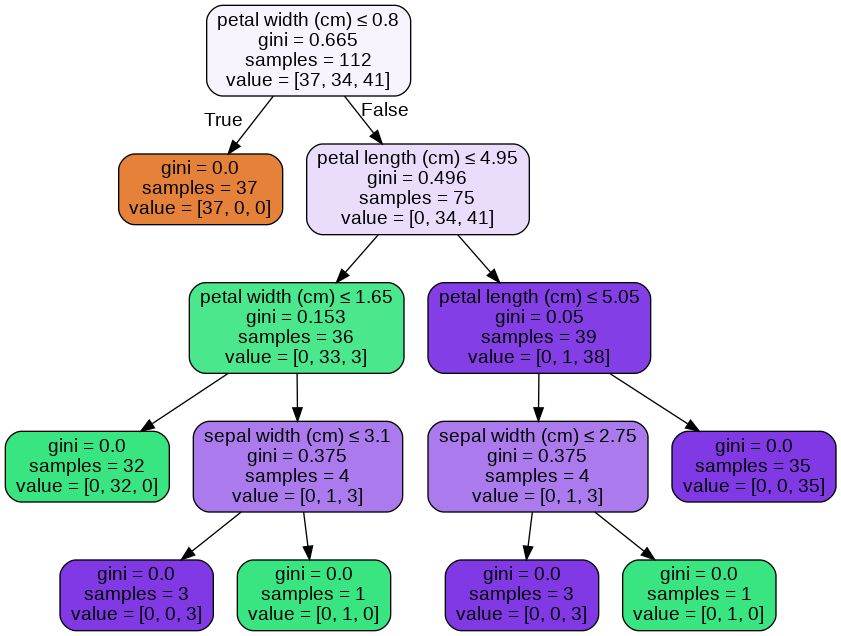

In [ ]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

When we run the decision tree algorithm, it will split our data into different segments. Each segment is called a leaf. The final leaves are called “Terminal leaves”. The splits are done in such a way as to maximize the number of points in a certain category. Each split tries to minimize entropy. It is a very complex concept — you can read up on it to understand the math behind it in the documentation link provided https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation

Alternatively, the tree can also be exported in textual format with the function export_text as shown below.

In [ ]:
from sklearn.tree import export_text

r = export_text(dtree, feature_names=iris['feature_names'])
print(r)

|--- petal length (cm) <= 2.35
|   |--- class: 0
|--- petal length (cm) >  2.35
|   |--- petal length (cm) <= 4.95
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |--- petal length (cm) >  4.95
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- class: 2



# **Step 5:** Make Predictions

Now that we have trained the model and understood the Decision Tree, let’s make some predictions using the test data.

In [ ]:
y_pred = dtree.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

# **Step 6:** Identifying the Accuracy of the model

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9736842105263158
